In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings 
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

### Diabetes Prediction 

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Model & Prediction

df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [15]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train, y_train)

In [16]:
loj_model.intercept_

array([-5.82834378])

In [17]:
loj_model.coef_

array([[ 0.06589516,  0.026775  , -0.01778569,  0.00304113, -0.00075652,
         0.05991877,  0.3043775 ,  0.02411359]])

In [18]:
loj_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [19]:
y_test[0:10]

668    0
324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
Name: Outcome, dtype: int64

In [20]:
y_pred = loj_model.predict(X_test)

[[ 43  26]
 [ 23 100]]


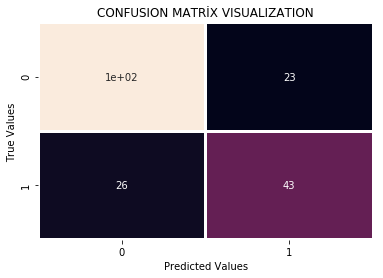

In [32]:
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, lw=2, cbar=False)

plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title('CONFUSION MATRİX VISUALIZATION')
plt.show()

In [22]:
accuracy_score(y_test, y_pred)

0.7447916666666666

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.62      0.64        69

   micro avg       0.74      0.74      0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



In [26]:
loj_model.predict_proba(X_test)[0:10]

array([[0.66350858, 0.33649142],
       [0.77623008, 0.22376992],
       [0.82392396, 0.17607604],
       [0.78662517, 0.21337483],
       [0.56591892, 0.43408108],
       [0.57891876, 0.42108124],
       [0.94617736, 0.05382264],
       [0.33754288, 0.66245712],
       [0.46470166, 0.53529834],
       [0.33119758, 0.66880242]])

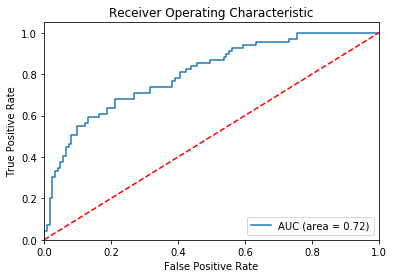

In [33]:
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()